In [6]:
# dependences 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Load dataset 
df = pd.read_csv("Datasets/house-prices-advanced-regression-techniques/train.csv")


In [5]:
# Preprocessing 

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']




Final Model Performance with Gradient Descent:
RMSE: 36623.05
R² Score: 0.8251


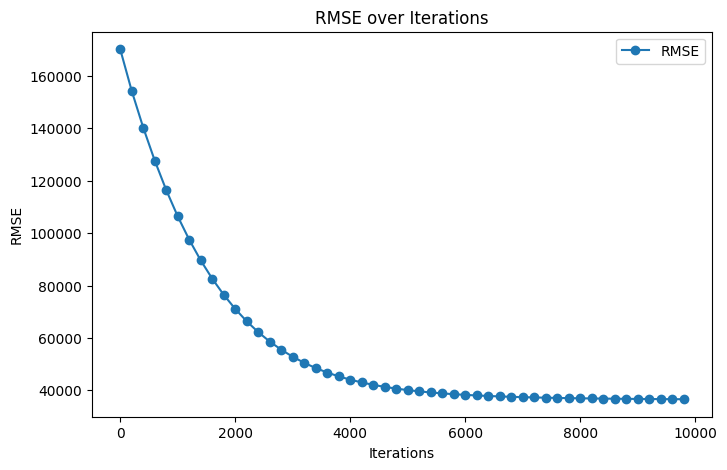

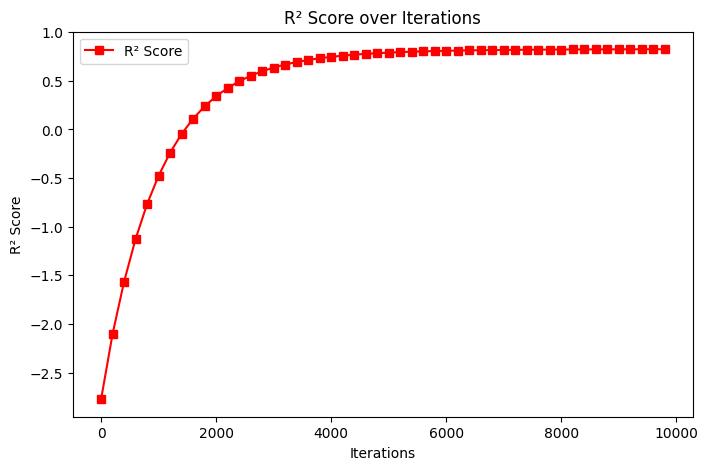

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SGDRegressor(learning_rate="constant", eta0=0.0001, random_state=42)

rmse_list = []
r2_list = []
iteration_list = []

n_iterations = 200

for i in range(1, 10001, n_iterations):
    model.partial_fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)
    iteration_list.append(i)
    
    if i % 2000 == 0:
        print(f"\nIteration {i}:")
        print(f"RMSE: {rmse:.2f}")
        print(f"R² Score: {r2:.4f}")
        print(f"First 5 Weights: {model.coef_[:5]}\n")

print("\nFinal Model Performance with Gradient Descent:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8,5))
plt.plot(iteration_list, rmse_list, marker='o', linestyle='-', label="RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("RMSE over Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(iteration_list, r2_list, marker='s', linestyle='-', color='red', label="R² Score")
plt.xlabel("Iterations")
plt.ylabel("R² Score")
plt.title("R² Score over Iterations")
plt.legend()
plt.show()


# The predicted price is 36,626$ off the real price 

